# S.M.Foysal Ahmed
1711416642

# problem:(a)
Reading the dataset using panda's dataframe

In [1]:
import sklearn as sk
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.pyplot import figure
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd


df = pd.read_csv('heart.csv')



# problem:(b)
number of instances and the number of features

In [2]:
print("number of total instances: ",len(df))
print("number of features(including target class): ",len(df.columns))

number of total instances:  303
number of features(including target class):  14


# problem:(c)
first five rows of the dataset

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# problem:(d)
Print the number of missing entries (i.e. the number of null values) per
feature. If there exists any missing entries, replace the value with that
particular feature's mean.

In [4]:
df.isna().sum()
#since theere is no null value,i didn't write code for: replacing null with mean value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# df['age'].fillna(df['age'].mean,inplace=True)

In [6]:
# df['age'].unique()

# problem:(e)
unique values per feature. If the number of unique values
for any feature is less than 10, print those unique feature values.

In [7]:
index=0
col_name=df.columns
for i in col_name:
    uniqe_value=df[col_name[index]].unique()
    c=0
    for x in uniqe_value:
        c=c+1
    print('number of uniqe value in "',i,'" column:',c)
    if c<10:
        print('the values are: ',uniqe_value)
    index=index+1
    print('\n')

  




number of uniqe value in " age " column: 41


number of uniqe value in " sex " column: 2
the values are:  [1 0]


number of uniqe value in " cp " column: 4
the values are:  [3 2 1 0]


number of uniqe value in " trestbps " column: 49


number of uniqe value in " chol " column: 152


number of uniqe value in " fbs " column: 2
the values are:  [1 0]


number of uniqe value in " restecg " column: 3
the values are:  [0 1 2]


number of uniqe value in " thalach " column: 91


number of uniqe value in " exang " column: 2
the values are:  [0 1]


number of uniqe value in " oldpeak " column: 40


number of uniqe value in " slope " column: 3
the values are:  [0 2 1]


number of uniqe value in " ca " column: 5
the values are:  [0 2 1 3 4]


number of uniqe value in " thal " column: 4
the values are:  [1 2 3 0]


number of uniqe value in " target " column: 2
the values are:  [1 0]




# problem:(f)
gender-wise age distribution. Show the
boxplot for target = 0 as well as target = 1

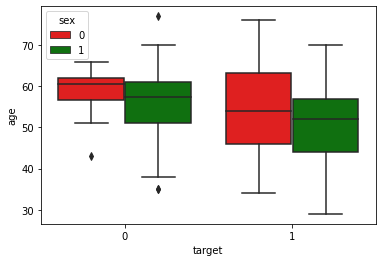

In [8]:
import seaborn as sb
pal=['red','green']
b=sb.boxplot(x="target",y="age",data=df,hue="sex",palette=pal)

# problem:(g)
chestpain-wise age distribution. Show
the boxplot for target = 0 as well as target = 1

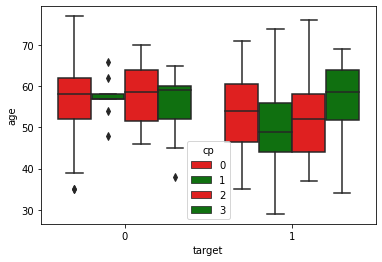

In [9]:
import seaborn as sb
pal=['red','green']
b=sb.boxplot(x="target",y="age",data=df,hue="cp",palette=pal)

# problem:(h)
ploting lmplot

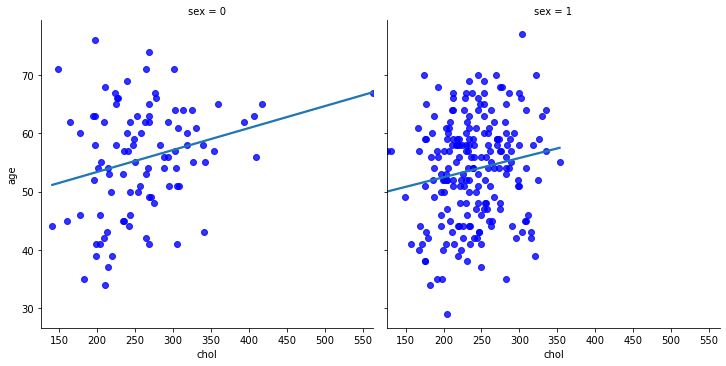

In [10]:
import seaborn as sb
#pal=['red','green']
b=sb.lmplot(x="chol",y="age",data=df,col='sex',height=5,scatter_kws={'color':'blue'},ci=False)

# problem:(i)
generating heatmap

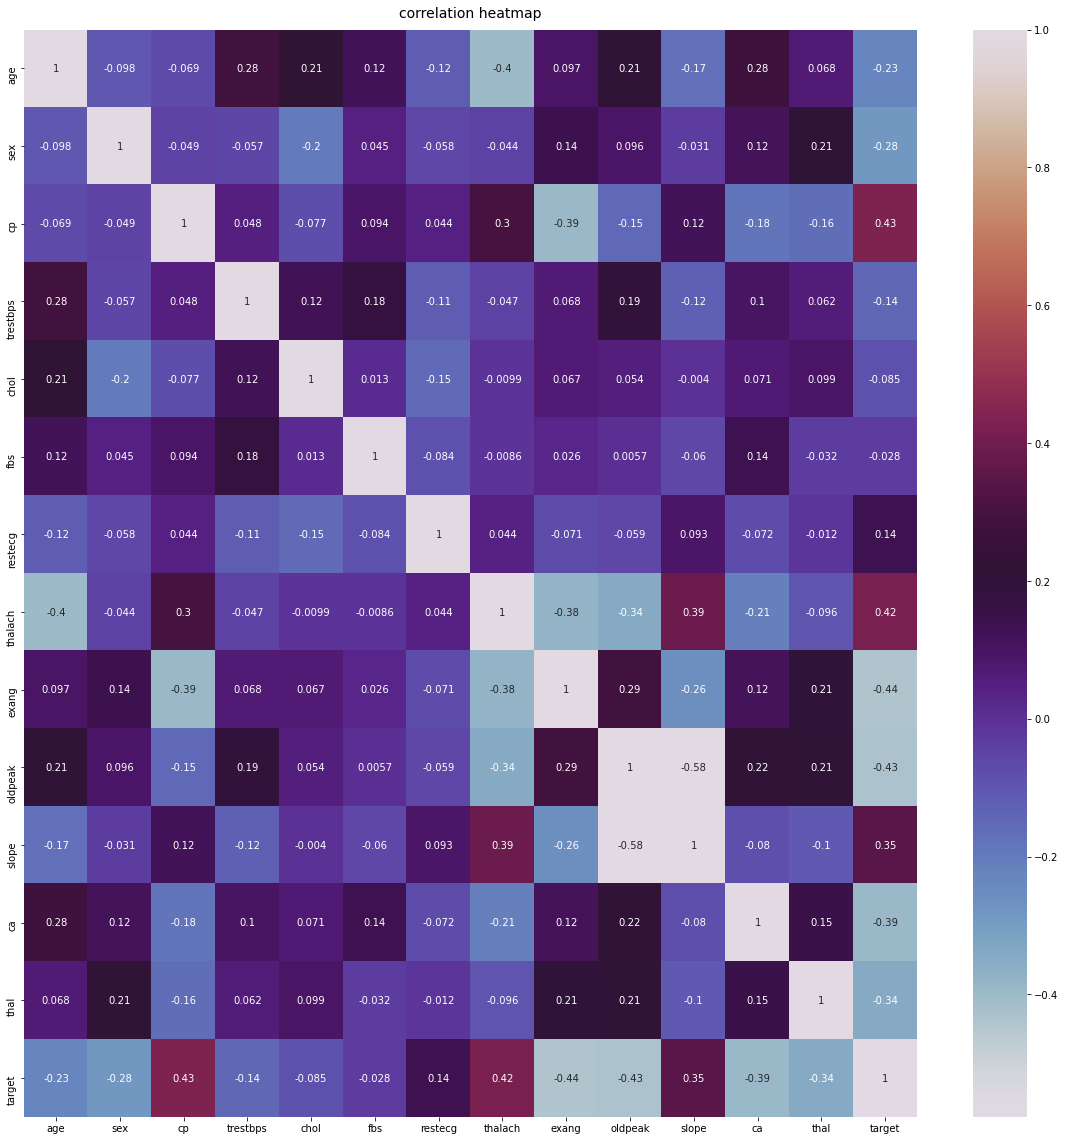

In [11]:
 %matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt 
plt.figure(figsize = (20,20))
dataplot=sb.heatmap(df.corr(), cmap = 'twilight', annot = True)
dataplot.set_title('correlation heatmap',fontdict={'fontsize':14},pad=12);


# problem:(j)
min-max scaling

In [12]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# scaler.fit(df)
# scaler.transform(df)


In [13]:
def min_max_scaler(df):
    df_copy=df.copy()
    for column in df_copy.columns:
        df_copy[column]=(df_copy[column]-df_copy[column].min())/(df_copy[column].max()-df_copy[column].min())
        
    return df_copy

In [14]:
df=min_max_scaler(df)

# problem:(k)
Finding accuracy using ZeroR, KNN, SVM, logistic regression and
Decision Tree

In [15]:
from sklearn.model_selection import train_test_split
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, cross_val_score

y = df['target']

X = df.drop(columns = 'target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]):
    print(train_index, test_index)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [0 1 2]
[ 0  1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [3 4 5]
[ 0  1  2  3  4  5  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [6 7 8]
[ 0  1  2  3  4  5  6  7  8 12 13 14 15 16 17 18 19 20 21 22 23] [ 9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22 23] [12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 17 18 19 20 21 22 23] [14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 20 21 22 23] [16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 20 21 22 23] [18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 23] [20 21]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [22 23]


In [17]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [18]:
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
folds = StratifiedKFold(n_splits = 10)
def models(X_train, y_train,scoring, cv):  #function that will take  operation name and return it for all mentioned clasifiers
    
    scoresDummy = cross_val_score(DummyClassifier(strategy="most_frequent"), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('for Dummy Model: %.3f (%.3f)' % (mean(scoresDummy), std(scoresDummy)))

    scoresLR = cross_val_score(LogisticRegression(), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))
    
    scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

    scoresSV = cross_val_score(SVC(), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

    scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))

    scoresDtree= cross_val_score(DecisionTreeClassifier(max_depth= 10, criterion='gini'), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('for Decision Tree Model: %.3f (%.3f)' % (mean(scoresDtree), std(scoresDtree)))
    

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


cv= StratifiedKFold(n_splits=10, random_state=1, shuffle = True)

print ('Accuracy: \n')
models(X_train, y_train, 'accuracy', cv)
print('\n')

print ('Precision: \n')
models(X_train, y_train, 'precision', cv)
print('\n')

print ('Recall: \n')
models(X_train, y_train, 'recall', cv)
print('\n')

print ('F-measure: \n')
models(X_train, y_train, 'f1', cv)
print('\n')

print ('ROC: \n')
models(X_train, y_train, 'roc_auc', cv)
print('\n')


Accuracy: 

for Dummy Model: 0.550 (0.013)
for Logistic Regression Model: 0.814 (0.065)
for Random Forest Model: 0.814 (0.082)
for SVM Model: 0.793 (0.081)
for KNN Model: 0.801 (0.082)
for Decision Tree Model: 0.714 (0.082)


Precision: 

for Dummy Model: 0.550 (0.013)
for Logistic Regression Model: 0.813 (0.071)
for Random Forest Model: 0.830 (0.072)
for SVM Model: 0.792 (0.082)
for KNN Model: 0.823 (0.086)
for Decision Tree Model: 0.742 (0.092)


Recall: 

for Dummy Model: 1.000 (0.000)
for Logistic Regression Model: 0.870 (0.103)
for Random Forest Model: 0.824 (0.134)
for SVM Model: 0.855 (0.106)
for KNN Model: 0.825 (0.130)
for Decision Tree Model: 0.780 (0.168)


F-measure: 

for Dummy Model: 0.709 (0.011)
for Logistic Regression Model: 0.836 (0.060)
for Random Forest Model: 0.822 (0.085)
for SVM Model: 0.818 (0.075)
for KNN Model: 0.816 (0.084)
for Decision Tree Model: 0.750 (0.098)


ROC: 

for Dummy Model: 0.500 (0.000)
for Logistic Regression Model: 0.905 (0.064)
for Random Fo